<a href="https://colab.research.google.com/github/122BT0251/Cognitive-Load-Estimator/blob/main/Cognitive_Load_Estimator_from_Text_or_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/content/train.csv")

In [3]:
val_df = pd.read_csv("/content/val.csv")

In [4]:
train_df

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,ending3,label
0,0,anetv_jkn6uvmqwh4,3416,Members of the procession walk down the street...,Members of the procession walk down the street...,A drum line,gold,passes by walking down the street playing thei...,has heard approaching them.,arrives and they're outside dancing and asleep.,turns the lead singer watches the performance.,0
1,1,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,continues to play as well along the crowd alon...,"continue to play marching, interspersed.",3
2,2,anetv_jkn6uvmqwh4,3415,A group of members in green uniforms walks wav...,A group of members in green uniforms walks wav...,Members of the procession,gold,pay the other coaches to cheer as people this ...,walk down the street holding small horn brass ...,is seen in the background.,are talking a couple of people playing a game ...,1
3,3,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,makes a square call and ends by jumping down i...,play and go back and forth hitting the drums w...,3
4,4,anetv_Bri_myFFu4A,2408,The person plays a song on the violin. The man,The person plays a song on the violin.,The man,gold,finishes the song and lowers the instrument.,hits the saxophone and demonstrates how to pro...,finishes massage the instrument again and cont...,continues dancing while the man gore the music...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73541,73541,lsmdc3073_THE_GUILT_TRIP-34734,2708,Someone bites her lower lip. Someone,Someone bites her lower lip.,Someone,gen,shifts her thoughtful gaze to the page.,sits down next to her on the bed.,"pats chin, looks down.",gives him a disapproving look.,1
73542,73542,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gen,appears on the left youth.,is overlaid on the nail.,zooms out holding her toothbrush.,stands in her lap as it moves away from her le...,3
73543,73543,anetv_R2izNBHhctM,60,A woman in pink dress is clipping the right pa...,A woman in pink dress is clipping the right pa...,"She took the left paw to clip, the cat looked ...",gold,is brushing on the wall with two toys.,gave them a bit and placed unto the cat's back.,looked down and gave her a quick kiss on the h...,drops the smooths it on the other side of the ...,2
73544,73544,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gold,was blinking to the camera.,is overlaid on the nail.,appears on the left youth.,zooms out holding her toothbrush.,0


In [5]:
val_df

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,ending3,label
0,0,lsmdc1052_Harry_Potter_and_the_order_of_phoeni...,18313,Students lower their eyes nervously. She,Students lower their eyes nervously.,She,gold,"pats her shoulder, then saunters toward someone.",turns with two students.,walks slowly towards someone.,wheels around as her dog thunders out.,2
1,1,anetv_dm5WXFiQZUQ,18419,He rides the motorcycle down the hall and into...,He rides the motorcycle down the hall and into...,He,gold,looks at a mirror in the mirror as he watches ...,"stops, listening to a cup of coffee with the s...",exits the building and rides the motorcycle in...,pulls the bag out of his pocket and hands it t...,2
2,2,anetv_dm5WXFiQZUQ,18418,The motorcyclist gets out of bed and prepares ...,The motorcyclist gets out of bed and prepares ...,He,gold,shoots a look at her.,makes his way past it and peers out a window.,rides the motorcycle down the hall and into th...,"sits on the ground beside her pants, clinging ...",2
3,3,lsmdc3017_CHRONICLE-7117,6588,We pan over to three girls chatting by a leaf ...,We pan over to three girls chatting by a leaf ...,It,gold,looks away for a second.,leaves the man to the middle of the room and n...,levitates and blows one girl's skirt up.,closes a phone before her door.,2
4,4,anetv_KNyM0KvDHMM,8893,A man is in a bike shop and stand next to a bi...,A man is in a bike shop and stand next to a bi...,The man,gold,uses a piece of wood to use it.,takes skis out of the bike and is shown one la...,holds a pointy tool that uses to fix the handl...,begins working out on his bike.,2
...,...,...,...,...,...,...,...,...,...,...,...,...
20001,20001,lsmdc3090_YOUNG_ADULT-43925,10182,Someone examines herself in the mirror and smi...,Someone examines herself in the mirror and smi...,"Sitting on her bed, she",gold,glances at the alarm clock.,stuffs her chair under the sink and looks thro...,pours as the heroes even lighter.,tugs out her bonds.,0
20002,20002,lsmdc3090_YOUNG_ADULT-43925,10179,"Back at the hotel, she shaves her legs in the ...","Back at the hotel, she shaves her legs in the ...","Standing in a mirror, she",gold,takes place in a trailer.,returns to her pajama and herself.,blinks her green hair and then dries herself.,rubs foundation onto her face.,3
20003,20003,lsmdc3090_YOUNG_ADULT-43925,10191,He smiles at her and approaches her table. Som...,He smiles at her and approaches her table.,Someone,gold,absently shakes her head and walks away.,perches in the passenger seat.,stands as someone hugs her.,leans on someone grill.,2
20004,20004,lsmdc3090_YOUNG_ADULT-43925,10187,Someone glances at two men drinking beers at t...,Someone glances at two men drinking beers at t...,She,gold,"rises, apparently quite a bit of vodka.",gets out of their volkswagen carriage.,gives back to someone.,looks down and pulls up the front of her dress.,3


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73546 entries, 0 to 73545
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   73546 non-null  int64 
 1   video-id     73546 non-null  object
 2   fold-ind     73546 non-null  int64 
 3   startphrase  73546 non-null  object
 4   sent1        73546 non-null  object
 5   sent2        73546 non-null  object
 6   gold-source  73546 non-null  object
 7   ending0      73546 non-null  object
 8   ending1      73546 non-null  object
 9   ending2      73546 non-null  object
 10  ending3      73546 non-null  object
 11  label        73546 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 6.7+ MB


In [7]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20006 entries, 0 to 20005
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   20006 non-null  int64 
 1   video-id     20006 non-null  object
 2   fold-ind     20006 non-null  int64 
 3   startphrase  20006 non-null  object
 4   sent1        20006 non-null  object
 5   sent2        20006 non-null  object
 6   gold-source  20006 non-null  object
 7   ending0      20006 non-null  object
 8   ending1      20006 non-null  object
 9   ending2      20006 non-null  object
 10  ending3      20006 non-null  object
 11  label        20006 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.8+ MB


In [8]:
train_df.columns

Index(['Unnamed: 0', 'video-id', 'fold-ind', 'startphrase', 'sent1', 'sent2',
       'gold-source', 'ending0', 'ending1', 'ending2', 'ending3', 'label'],
      dtype='object')

In [9]:
train_df.head()

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,ending3,label
0,0,anetv_jkn6uvmqwh4,3416,Members of the procession walk down the street...,Members of the procession walk down the street...,A drum line,gold,passes by walking down the street playing thei...,has heard approaching them.,arrives and they're outside dancing and asleep.,turns the lead singer watches the performance.,0
1,1,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,continues to play as well along the crowd alon...,"continue to play marching, interspersed.",3
2,2,anetv_jkn6uvmqwh4,3415,A group of members in green uniforms walks wav...,A group of members in green uniforms walks wav...,Members of the procession,gold,pay the other coaches to cheer as people this ...,walk down the street holding small horn brass ...,is seen in the background.,are talking a couple of people playing a game ...,1
3,3,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,makes a square call and ends by jumping down i...,play and go back and forth hitting the drums w...,3
4,4,anetv_Bri_myFFu4A,2408,The person plays a song on the violin. The man,The person plays a song on the violin.,The man,gold,finishes the song and lowers the instrument.,hits the saxophone and demonstrates how to pro...,finishes massage the instrument again and cont...,continues dancing while the man gore the music...,0


In [10]:
def combine_text(row):
    correct_ending = row[f'ending{row["label"]}']  # Get the correct option
    return row['startphrase'] + " " + correct_ending


In [11]:
train_df['full_text'] = train_df.apply(combine_text, axis=1)
val_df['full_text'] = val_df.apply(combine_text, axis=1)


In [12]:
train_df

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,ending3,label,full_text
0,0,anetv_jkn6uvmqwh4,3416,Members of the procession walk down the street...,Members of the procession walk down the street...,A drum line,gold,passes by walking down the street playing thei...,has heard approaching them.,arrives and they're outside dancing and asleep.,turns the lead singer watches the performance.,0,Members of the procession walk down the street...
1,1,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,continues to play as well along the crowd alon...,"continue to play marching, interspersed.",3,A drum line passes by walking down the street ...
2,2,anetv_jkn6uvmqwh4,3415,A group of members in green uniforms walks wav...,A group of members in green uniforms walks wav...,Members of the procession,gold,pay the other coaches to cheer as people this ...,walk down the street holding small horn brass ...,is seen in the background.,are talking a couple of people playing a game ...,1,A group of members in green uniforms walks wav...
3,3,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,makes a square call and ends by jumping down i...,play and go back and forth hitting the drums w...,3,A drum line passes by walking down the street ...
4,4,anetv_Bri_myFFu4A,2408,The person plays a song on the violin. The man,The person plays a song on the violin.,The man,gold,finishes the song and lowers the instrument.,hits the saxophone and demonstrates how to pro...,finishes massage the instrument again and cont...,continues dancing while the man gore the music...,0,The person plays a song on the violin. The man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73541,73541,lsmdc3073_THE_GUILT_TRIP-34734,2708,Someone bites her lower lip. Someone,Someone bites her lower lip.,Someone,gen,shifts her thoughtful gaze to the page.,sits down next to her on the bed.,"pats chin, looks down.",gives him a disapproving look.,1,Someone bites her lower lip. Someone sits down...
73542,73542,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gen,appears on the left youth.,is overlaid on the nail.,zooms out holding her toothbrush.,stands in her lap as it moves away from her le...,3,The cat looked up while the woman is clipping ...
73543,73543,anetv_R2izNBHhctM,60,A woman in pink dress is clipping the right pa...,A woman in pink dress is clipping the right pa...,"She took the left paw to clip, the cat looked ...",gold,is brushing on the wall with two toys.,gave them a bit and placed unto the cat's back.,looked down and gave her a quick kiss on the h...,drops the smooths it on the other side of the ...,2,A woman in pink dress is clipping the right pa...
73544,73544,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gold,was blinking to the camera.,is overlaid on the nail.,appears on the left youth.,zooms out holding her toothbrush.,0,The cat looked up while the woman is clipping ...


In [13]:
val_df

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,ending3,label,full_text
0,0,lsmdc1052_Harry_Potter_and_the_order_of_phoeni...,18313,Students lower their eyes nervously. She,Students lower their eyes nervously.,She,gold,"pats her shoulder, then saunters toward someone.",turns with two students.,walks slowly towards someone.,wheels around as her dog thunders out.,2,Students lower their eyes nervously. She walks...
1,1,anetv_dm5WXFiQZUQ,18419,He rides the motorcycle down the hall and into...,He rides the motorcycle down the hall and into...,He,gold,looks at a mirror in the mirror as he watches ...,"stops, listening to a cup of coffee with the s...",exits the building and rides the motorcycle in...,pulls the bag out of his pocket and hands it t...,2,He rides the motorcycle down the hall and into...
2,2,anetv_dm5WXFiQZUQ,18418,The motorcyclist gets out of bed and prepares ...,The motorcyclist gets out of bed and prepares ...,He,gold,shoots a look at her.,makes his way past it and peers out a window.,rides the motorcycle down the hall and into th...,"sits on the ground beside her pants, clinging ...",2,The motorcyclist gets out of bed and prepares ...
3,3,lsmdc3017_CHRONICLE-7117,6588,We pan over to three girls chatting by a leaf ...,We pan over to three girls chatting by a leaf ...,It,gold,looks away for a second.,leaves the man to the middle of the room and n...,levitates and blows one girl's skirt up.,closes a phone before her door.,2,We pan over to three girls chatting by a leaf ...
4,4,anetv_KNyM0KvDHMM,8893,A man is in a bike shop and stand next to a bi...,A man is in a bike shop and stand next to a bi...,The man,gold,uses a piece of wood to use it.,takes skis out of the bike and is shown one la...,holds a pointy tool that uses to fix the handl...,begins working out on his bike.,2,A man is in a bike shop and stand next to a bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20001,20001,lsmdc3090_YOUNG_ADULT-43925,10182,Someone examines herself in the mirror and smi...,Someone examines herself in the mirror and smi...,"Sitting on her bed, she",gold,glances at the alarm clock.,stuffs her chair under the sink and looks thro...,pours as the heroes even lighter.,tugs out her bonds.,0,Someone examines herself in the mirror and smi...
20002,20002,lsmdc3090_YOUNG_ADULT-43925,10179,"Back at the hotel, she shaves her legs in the ...","Back at the hotel, she shaves her legs in the ...","Standing in a mirror, she",gold,takes place in a trailer.,returns to her pajama and herself.,blinks her green hair and then dries herself.,rubs foundation onto her face.,3,"Back at the hotel, she shaves her legs in the ..."
20003,20003,lsmdc3090_YOUNG_ADULT-43925,10191,He smiles at her and approaches her table. Som...,He smiles at her and approaches her table.,Someone,gold,absently shakes her head and walks away.,perches in the passenger seat.,stands as someone hugs her.,leans on someone grill.,2,He smiles at her and approaches her table. Som...
20004,20004,lsmdc3090_YOUNG_ADULT-43925,10187,Someone glances at two men drinking beers at t...,Someone glances at two men drinking beers at t...,She,gold,"rises, apparently quite a bit of vodka.",gets out of their volkswagen carriage.,gives back to someone.,looks down and pulls up the front of her dress.,3,Someone glances at two men drinking beers at t...


**Feature Engineering**

In [14]:
!pip install textstat
!pip install nltk
import nltk
nltk.download('punkt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Lexical Feature**

In [15]:
import textstat

train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))
train_df['avg_word_length'] = train_df['full_text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
train_df['avg_sentence_length'] = train_df['full_text'].apply(textstat.avg_sentence_length)
train_df['syllable_count'] = train_df['full_text'].apply(textstat.syllable_count)


In [16]:
train_df['word_count']

,word_count
0,25
1,21
2,23
3,31
4,17
...,...
73541,14
73542,39
73543,45
73544,32


In [17]:
train_df['avg_word_length']

,avg_word_length
0,5.320000
1,5.666667
2,5.173913
3,4.774194
4,4.411765
...,...
73541,4.071429
73542,3.794872
73543,3.533333
73544,4.000000


In [18]:
train_df['avg_sentence_length']

,avg_sentence_length
0,12.5
1,10.5
2,11.5
3,15.5
4,8.5
...,...
73541,7.0
73542,19.5
73543,22.5
73544,16.0


In [19]:
train_df['syllable_count']

,syllable_count
0,36
1,34
2,33
3,42
4,25
...,...
73541,17
73542,44
73543,49
73544,39


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_syntax_features(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    tree_depths = [token.head.i - token.i for token in doc if token != token.head]

    return {
        'noun_count': pos_counts.get(nlp.vocab.strings['NOUN'], 0),
        'verb_count': pos_counts.get(nlp.vocab.strings['VERB'], 0),
        'adj_count': pos_counts.get(nlp.vocab.strings['ADJ'], 0),
        'avg_tree_depth': sum(abs(d) for d in tree_depths) / len(tree_depths) if tree_depths else 0
    }

syntax_features = train_df['full_text'].apply(get_syntax_features)
syntax_df = pd.DataFrame(syntax_features.tolist())

train_df = pd.concat([train_df, syntax_df], axis=1)


In [21]:
syntax_df

,noun_count,verb_count,adj_count,avg_tree_depth
0,10,5,1,2.400000
1,7,6,0,2.272727
2,10,4,2,2.304348
3,8,7,0,2.483871
4,6,3,0,2.294118
...,...,...,...,...
73541,2,2,1,2.357143
73542,9,5,3,2.700000
73543,10,7,5,2.478261
73544,8,4,2,2.636364


In [22]:
train_df

,Unnamed: 0,video-id,fold-ind,startphrase,sent1,sent2,gold-source,ending0,ending1,ending2,...,label,full_text,word_count,avg_word_length,avg_sentence_length,syllable_count,noun_count,verb_count,adj_count,avg_tree_depth
0,0,anetv_jkn6uvmqwh4,3416,Members of the procession walk down the street...,Members of the procession walk down the street...,A drum line,gold,passes by walking down the street playing thei...,has heard approaching them.,arrives and they're outside dancing and asleep.,...,0,Members of the procession walk down the street...,25,5.320000,12.5,36,10,5,1,2.400000
1,1,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,continues to play as well along the crowd alon...,...,3,A drum line passes by walking down the street ...,21,5.666667,10.5,34,7,6,0,2.272727
2,2,anetv_jkn6uvmqwh4,3415,A group of members in green uniforms walks wav...,A group of members in green uniforms walks wav...,Members of the procession,gold,pay the other coaches to cheer as people this ...,walk down the street holding small horn brass ...,is seen in the background.,...,1,A group of members in green uniforms walks wav...,23,5.173913,11.5,33,10,4,2,2.304348
3,3,anetv_jkn6uvmqwh4,3417,A drum line passes by walking down the street ...,A drum line passes by walking down the street ...,Members of the procession,gen,are playing ping pong and celebrating one left...,wait slowly towards the cadets.,makes a square call and ends by jumping down i...,...,3,A drum line passes by walking down the street ...,31,4.774194,15.5,42,8,7,0,2.483871
4,4,anetv_Bri_myFFu4A,2408,The person plays a song on the violin. The man,The person plays a song on the violin.,The man,gold,finishes the song and lowers the instrument.,hits the saxophone and demonstrates how to pro...,finishes massage the instrument again and cont...,...,0,The person plays a song on the violin. The man...,17,4.411765,8.5,25,6,3,0,2.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73541,73541,lsmdc3073_THE_GUILT_TRIP-34734,2708,Someone bites her lower lip. Someone,Someone bites her lower lip.,Someone,gen,shifts her thoughtful gaze to the page.,sits down next to her on the bed.,"pats chin, looks down.",...,1,Someone bites her lower lip. Someone sits down...,14,4.071429,7.0,17,2,2,1,2.357143
73542,73542,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gen,appears on the left youth.,is overlaid on the nail.,zooms out holding her toothbrush.,...,3,The cat looked up while the woman is clipping ...,39,3.794872,19.5,44,9,5,3,2.700000
73543,73543,anetv_R2izNBHhctM,60,A woman in pink dress is clipping the right pa...,A woman in pink dress is clipping the right pa...,"She took the left paw to clip, the cat looked ...",gold,is brushing on the wall with two toys.,gave them a bit and placed unto the cat's back.,looked down and gave her a quick kiss on the h...,...,2,A woman in pink dress is clipping the right pa...,45,3.533333,22.5,49,10,7,5,2.478261
73544,73544,anetv_R2izNBHhctM,62,The cat looked up while the woman is clipping ...,The cat looked up while the woman is clipping ...,"While the woman is clipping the left back paw,...",gold,was blinking to the camera.,is overlaid on the nail.,appears on the left youth.,...,0,The cat looked up while the woman is clipping ...,32,4.000000,16.0,39,8,4,2,2.636364


In [23]:
def count_named_entities(text):
    doc = nlp(text)
    return len(doc.ents)

train_df['named_entity_count'] = train_df['full_text'].apply(count_named_entities)


In [24]:
train_df['named_entity_count']

,named_entity_count
0,0
1,0
2,0
3,0
4,0
...,...
73541,0
73542,0
73543,0
73544,0


In [25]:
!pip install empath
from empath import Empath
lexicon = Empath()

train_df['focus_score'] = train_df['full_text'].apply(lambda x: lexicon.analyze(x, categories=["focus"])['focus'])
train_df['neglect_score'] = train_df['full_text'].apply(lambda x: lexicon.analyze(x, categories=["neglect"])['neglect'])
train_df['anxiety_score'] = train_df['full_text'].apply(lambda x: lexicon.analyze(x, categories=["anxiety"])['anxiety'])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57799 sha256=6143544330fc502f917b9ddef666f7a0f358dc5116eeedfc154c922d2bcf9ea0
  Stored in directory: /root/.cache/pip/wheels/b5/93/85/f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [26]:
train_df['focus_score']

,focus_score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
73541,0.0
73542,0.0
73543,0.0
73544,0.0


In [27]:
train_df['neglect_score']

,neglect_score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
73541,0.0
73542,0.0
73543,0.0
73544,0.0


In [28]:
train_df['anxiety_score']

,anxiety_score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
73541,0.0
73542,0.0
73543,0.0
73544,0.0


In [29]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
train_embeddings = model.encode(train_df['full_text'].tolist(), show_progress_bar=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 931.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2299 [00:00<?, ?it/s]

In [30]:
train_embeddings

array([[ 0.04913333, -0.01941878,  0.08366787, ...,  0.00842121,
        -0.01118933,  0.00250728],
       [ 0.02635522, -0.02200967,  0.0816168 , ...,  0.04154445,
         0.02396367,  0.00294674],
       [ 0.0406725 ,  0.00956581,  0.04817072, ..., -0.01548598,
        -0.05178243,  0.00955726],
       ...,
       [-0.02107714, -0.01560038,  0.04276194, ...,  0.09084934,
         0.04589618,  0.01663489],
       [-0.01483752,  0.02857279, -0.02006103, ...,  0.06709831,
         0.03653291,  0.07961731],
       [-0.01284931,  0.05671664,  0.0090124 , ...,  0.12863418,
         0.03089539,  0.03604048]], dtype=float32)

In [31]:
import textstat

# Step 1: Compute reading ease if not already done
train_df['flesch_reading_ease'] = train_df['full_text'].apply(textstat.flesch_reading_ease)

# Step 2: Create cognitive load labels based on score
def map_cognitive_load(score):
    if score >= 60:
        return 'low'
    elif score >= 30:
        return 'medium'
    else:
        return 'high'

train_df['cognitive_load'] = train_df['flesch_reading_ease'].apply(map_cognitive_load)


In [32]:

print(train_df['cognitive_load'].value_counts())


cognitive_load
low       69848
medium     3675
high         23
Name: count, dtype: int64


In [33]:
# Define X (features) and y (target)
feature_cols = ['word_count', 'avg_word_length', 'avg_sentence_length', 'flesch_reading_ease',
                'noun_count', 'verb_count', 'adj_count', 'named_entity_count']  # Add more if you have

X = train_df[feature_cols]
y = train_df['cognitive_load']


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(train_df['cognitive_load'])  # converts 'low', 'medium', 'high' to 0, 1, 2



In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [38]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [39]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

print("SVM")
print(classification_report(y_test, y_pred_svm))


Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00     13929
           2       1.00      0.99      0.99       779

    accuracy                           1.00     14710
   macro avg       0.67      0.66      0.66     14710
weighted avg       1.00      1.00      1.00     14710

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00     13929
           2       1.00      1.00      1.00       779

    accuracy                           1.00     14710
   macro avg       1.00      1.00      1.00     14710
weighted avg       1.00      1.00      1.00     14710

SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00     13929
           2       1.00      0.98    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
from sklearn.metrics import roc_auc_score

rf_probs = rf.predict_proba(X_test)
print("ROC-AUC Score (RF):", roc_auc_score(y_test, rf_probs, multi_class='ovr'))


ROC-AUC Score (RF): 1.0


In [41]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

X_embed = model.encode(train_df['full_text'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/2299 [00:00<?, ?it/s]

In [42]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_embed, y_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
y_pred_xgb = xgb_clf.predict(X_embed)
print(classification_report(y_encoded, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00     69848
           2       1.00      0.98      0.99      3675

    accuracy                           1.00     73546
   macro avg       1.00      0.99      1.00     73546
weighted avg       1.00      1.00      1.00     73546



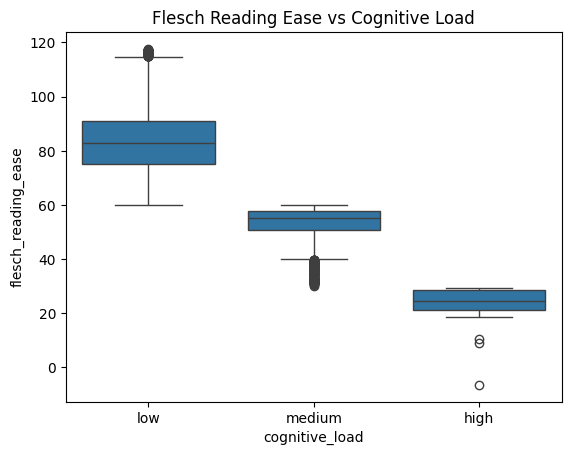

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cognitive_load', y='flesch_reading_ease', data=train_df)
plt.title('Flesch Reading Ease vs Cognitive Load')
plt.show()


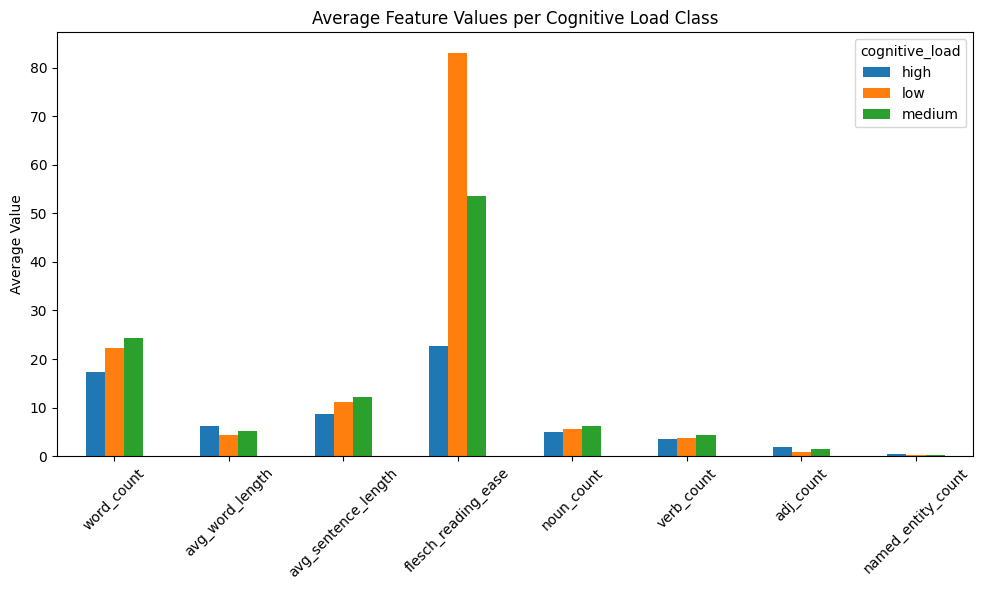

In [45]:
import numpy as np

grouped = train_df.groupby('cognitive_load')[X.columns].mean()

grouped.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values per Cognitive Load Class')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
import plotly.express as px

fig = px.scatter(
    train_df,
    x='flesch_reading_ease',
    y='avg_sentence_length',
    color='cognitive_load',
    hover_data=['word_count', 'named_entity_count'],
    title='Flesch Reading Ease vs Avg Sentence Length (Colored by Load)'
)
fig.show()


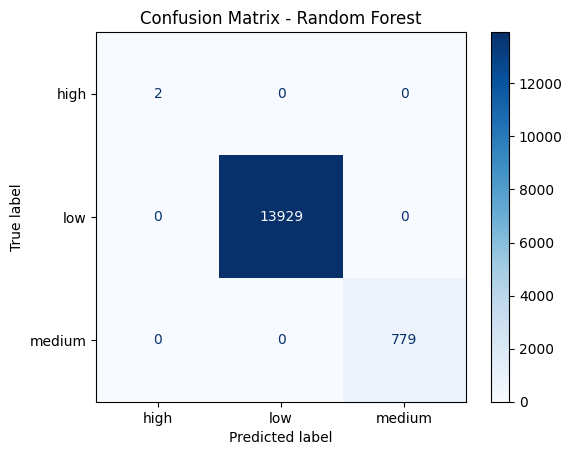

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)  # or y_pred_lr, y_pred_svm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()


<Figure size 640x480 with 0 Axes>

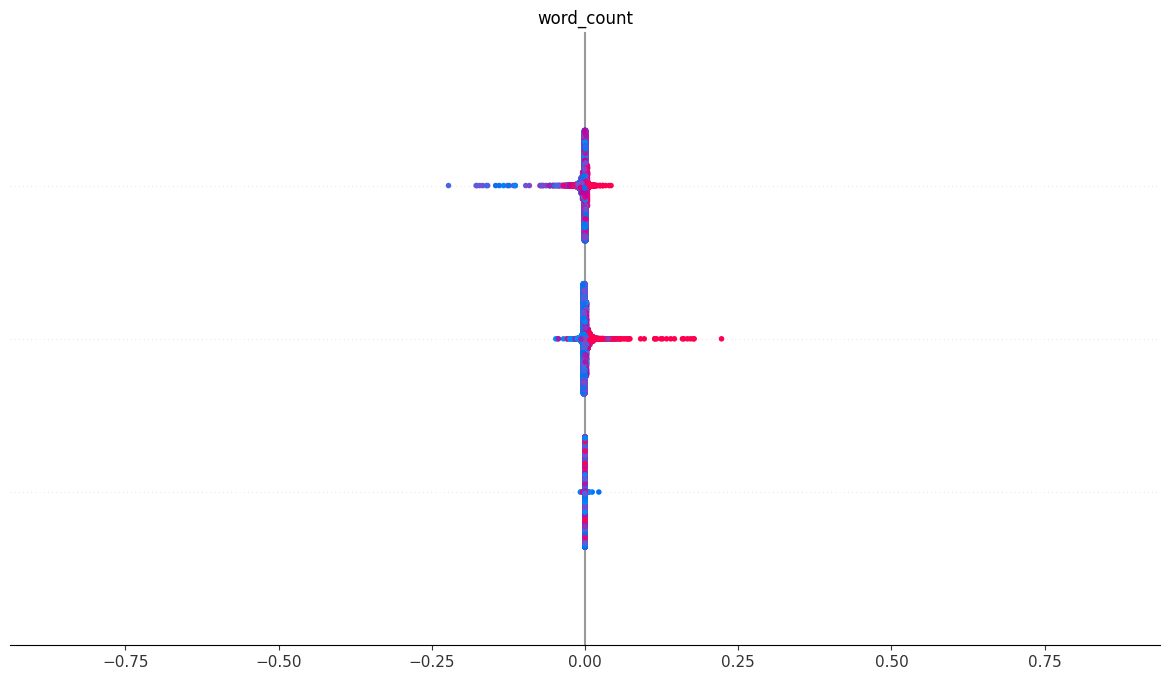

In [48]:
import shap

explainer = shap.TreeExplainer(rf)  # or xgb_clf
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [49]:
# Example combine_text() function if you have multiple endings
def combine_text(row):
    return row['startphrase'] + " " + row['ending0']  # Or choose the correct ending based on your logic

val_df['full_text'] = val_df.apply(combine_text, axis=1)


In [50]:
import textstat

val_df['flesch_reading_ease'] = val_df['full_text'].apply(textstat.flesch_reading_ease)

def map_cognitive_load(score):
    if score >= 60:
        return 'low'
    elif score >= 30:
        return 'medium'
    else:
        return 'high'

val_df['cognitive_load'] = val_df['flesch_reading_ease'].apply(map_cognitive_load)


In [51]:
print(X.columns)
feature_cols = ['flesch_reading_ease', 'avg_sentence_length', 'word_count']




Index(['word_count', 'avg_word_length', 'avg_sentence_length',
       'flesch_reading_ease', 'noun_count', 'verb_count', 'adj_count',
       'named_entity_count'],
      dtype='object')


In [52]:
import textstat

val_df['flesch_reading_ease'] = val_df['full_text'].apply(textstat.flesch_reading_ease)
val_df['avg_sentence_length'] = val_df['full_text'].apply(lambda x: len(x.split()) / (x.count('.') + 1))
val_df['word_count'] = val_df['full_text'].apply(lambda x: len(x.split()))


In [53]:
X_val = val_df[feature_cols]
y_val = val_df['cognitive_load']


In [54]:
y_val_encoded = le.transform(y_val)  # This converts 'low', 'medium', 'high' to 0, 1, 2 (same mapping)


In [55]:

print(rf)

print(X_val.shape)


RandomForestClassifier()
(20006, 3)


In [57]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Function to extract syntactic features
def extract_syntactic_features(text):
    doc = nlp(text)
    adj_count = len([token for token in doc if token.pos_ == "ADJ"])
    noun_count = len([token for token in doc if token.pos_ == "NOUN"])
    verb_count = len([token for token in doc if token.pos_ == "VERB"])
    named_entity_count = len(doc.ents)
    avg_word_length = sum(len(token.text) for token in doc if token.is_alpha) / (len([token for token in doc if token.is_alpha]) + 1e-6)
    return pd.Series([adj_count, noun_count, verb_count, named_entity_count, avg_word_length])

# Apply to val_df
val_df[['adj_count', 'noun_count', 'verb_count', 'named_entity_count', 'avg_word_length']] = val_df['full_text'].apply(extract_syntactic_features)



In [58]:
feature_cols = ['flesch_reading_ease', 'avg_sentence_length', 'word_count',
                'adj_count', 'noun_count', 'verb_count',
                'named_entity_count', 'avg_word_length']


In [61]:
feature_cols = X_train.columns.tolist()


In [62]:
X_val = val_df[feature_cols]


In [63]:
y_val_pred = rf.predict(X_val)


Accuracy: 0.9999500149955014
F1 Score: 0.9999483610260992

Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.88      0.93         8
         low       1.00      1.00      1.00     18974
      medium       1.00      1.00      1.00      1024

    accuracy                           1.00     20006
   macro avg       1.00      0.96      0.98     20006
weighted avg       1.00      1.00      1.00     20006



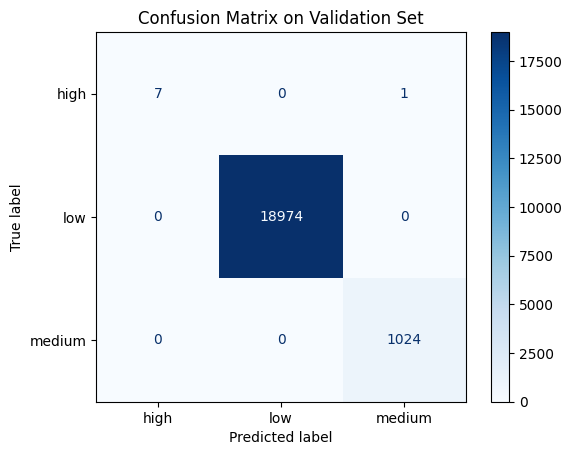

In [64]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_val_encoded, y_val_pred))
print("F1 Score:", f1_score(y_val_encoded, y_val_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val_encoded, y_val_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_val_encoded, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Validation Set')
plt.show()


In [71]:


def extract_features_from_text(text):
    import textstat

    fre = textstat.flesch_reading_ease(text)
    asl = len(text.split()) / (text.count('.') + 1)  # average sentence length
    wc = len(text.split())

    # Add more features here ONLY if you used them in training:
    return pd.DataFrame([[fre, asl, wc]], columns=[
        'flesch_reading_ease', 'avg_sentence_length', 'word_count'
    ])



In [75]:
import spacy
import textstat
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features_from_text(text):
    doc = nlp(text)

    # TextStat features
    fre = textstat.flesch_reading_ease(text)
    asl = len(text.split()) / (text.count('.') + 1)
    wc = len(text.split())
    avg_word_len = sum(len(word) for word in text.split()) / len(text.split())

    # POS and Entity features
    noun_count = sum(1 for token in doc if token.pos_ == "NOUN")
    verb_count = sum(1 for token in doc if token.pos_ == "VERB")
    adj_count = sum(1 for token in doc if token.pos_ == "ADJ")
    named_entity_count = len(doc.ents)

    return pd.DataFrame([[fre, asl, wc, avg_word_len, noun_count, verb_count, adj_count, named_entity_count]],
                        columns=[
                            'flesch_reading_ease',
                            'avg_sentence_length',
                            'word_count',
                            'avg_word_length',
                            'noun_count',
                            'verb_count',
                            'adj_count',
                            'named_entity_count'
                        ])


In [76]:
custom_text = """
Machine learning is a subset of artificial intelligence that allows computers to learn from data and make decisions without being explicitly programmed.
"""



In [77]:
X_custom = extract_features_from_text(custom_text)


In [98]:
X_custom

,flesch_reading_ease,avg_sentence_length,word_count,avg_word_length,noun_count,verb_count,adj_count,named_entity_count
0,19.150455,11.0,22,5.954545,7,4,1,0


In [86]:
feature_columns = list(X_train.columns)
print(feature_columns)


['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']


In [87]:
feature_columns = ['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']



In [88]:
X_train = train_df[feature_columns]


In [91]:
print("Columns used for training:")
print(list(X_train.columns))


Columns used for training:
['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']


In [93]:
# Your saved feature columns list (make sure it's the one used during training)
feature_columns = ['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']

# Extract features from your text
X_custom = extract_features_from_text(custom_text)

# Reorder columns to match training order
X_custom = X_custom[feature_columns]





In [94]:
print("Columns before predict:", list(X_custom.columns))
print("Columns model expects:", list(X_train.columns))


Columns before predict: ['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']
Columns model expects: ['flesch_reading_ease', 'avg_sentence_length', 'word_count', 'avg_word_length', 'noun_count', 'verb_count', 'adj_count', 'named_entity_count']


In [95]:
print(X_custom.dtypes)
print(X_train.dtypes)


flesch_reading_ease    float64
avg_sentence_length    float64
word_count               int64
avg_word_length        float64
noun_count               int64
verb_count               int64
adj_count                int64
named_entity_count       int64
dtype: object
flesch_reading_ease    float64
avg_sentence_length    float64
word_count               int64
avg_word_length        float64
noun_count               int64
verb_count               int64
adj_count                int64
named_entity_count       int64
dtype: object


In [100]:
# Assume rf and le are already loaded/trained

# Extract features from your text (make sure this returns all required features with correct names)
X_custom = extract_features_from_text(custom_text)

# Reorder columns exactly as model expects
X_custom = X_custom[rf.feature_names_in_]

# Convert types to float if needed
X_custom = X_custom.astype(float)

# Predict
y_pred = rf.predict(X_custom)
predicted_label = le.inverse_transform(y_pred)[0]
print(f"Predicted Cognitive Load: {predicted_label}")



Predicted Cognitive Load: 0


In [101]:
X_custom = extract_features_from_text(custom_text)
X_custom = X_custom[rf.feature_names_in_]
X_custom = X_custom.astype(float)

y_pred = rf.predict(X_custom)
predicted_label = le.inverse_transform([y_pred[0]])[0]  # decode label

print(f"Predicted Cognitive Load: {predicted_label}")


Predicted Cognitive Load: 0
